## Data Mining Final Project_Final Code Submission

#### Team Members: Jaijun Bao; Mingjun Gao; Linda Han, Puhan Li

In [1]:
import pandas as pd
from info_gain import info_gain
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Import data

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.shape

(30000, 25)

In [3]:
for i in range(1,7):
    df['PAY_AMT'+str(i)]=df['PAY_AMT'+str(i)]/df['LIMIT_BAL']
    df['BILL_AMT'+str(i)]=df['BILL_AMT'+str(i)]/df['LIMIT_BAL']

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.000000,0.000000,0.000000,0.000000,0.034450,0.000000,0.000000,0.000000,0.000000,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.027267,0.028792,0.027175,0.000000,0.008333,0.008333,0.008333,0.000000,0.016667,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,0.159233,0.166089,0.172767,0.016867,0.016667,0.011111,0.011111,0.011111,0.055556,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0.566280,0.579180,0.590940,0.040000,0.040380,0.024000,0.022000,0.021380,0.020000,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0.418800,0.382920,0.382620,0.040000,0.733620,0.200000,0.180000,0.013780,0.013580,0


### Feature Importance

In [5]:
data=df
for feature in data.columns.values.tolist():
    ig  = info_gain.info_gain(data[feature], data['default.payment.next.month'])
    print(feature+":  ",ig)

ID:   0.5284225707356818
LIMIT_BAL:   0.016864653596992074
SEX:   0.0007930447147915798
EDUCATION:   0.003078467015979136
MARRIAGE:   0.0006101529703606001
AGE:   0.0025666495414591317
PAY_0:   0.07605263493485959
PAY_2:   0.04905609321582127
PAY_3:   0.03727810247043006
PAY_4:   0.03288779570614908
PAY_5:   0.030543599627198104
PAY_6:   0.02642224377868696
BILL_AMT1:   0.4451071195510714
BILL_AMT2:   0.43950636681299393
BILL_AMT3:   0.4335877900700478
BILL_AMT4:   0.42812566555052456
BILL_AMT5:   0.42078030680929857
BILL_AMT6:   0.41501091254473543
PAY_AMT1:   0.21924904965179515
PAY_AMT2:   0.21628197896200607
PAY_AMT3:   0.20321699964666085
PAY_AMT4:   0.19102139670512397
PAY_AMT5:   0.1896784778685321
PAY_AMT6:   0.18711271777759464
default.payment.next.month:   0.5284225707356826


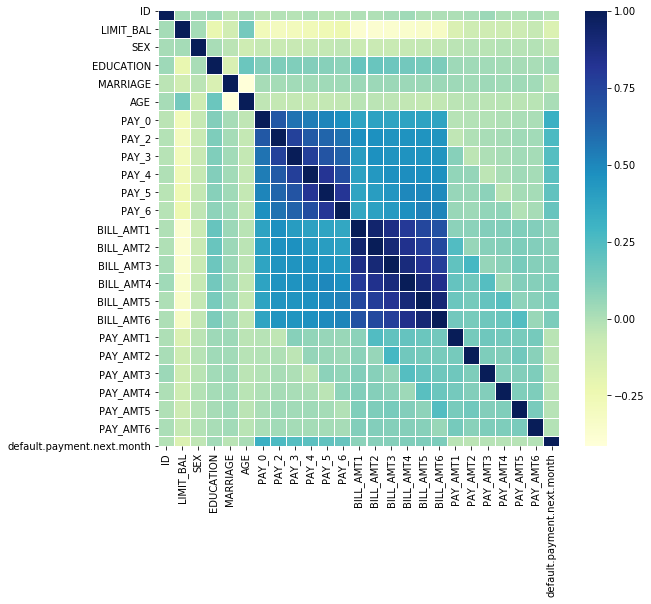

In [6]:
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

### Model Training Data Prep

In [7]:
positive=df.loc[df['default.payment.next.month'] == 1]
negative=df.loc[df['default.payment.next.month'] == 0]
positive=positive.sample(n=5000, random_state=1 )
negative=negative.sample(n=5000, random_state=1 )
df=pd.concat([positive,negative])
X=df.iloc[:,1:24]
Y=df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=49)

In [8]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [9]:
print(X_train_valid.shape)
print(X_test_valid.shape)
print(X_test.shape)

(4900, 23)
(2100, 23)
(3000, 23)


### Model Trainig - Random Forest

Random Forest Model has been tuned for some basic parameters:
- Increase the n_estimators which means increasing the number of trees
- Add the max_depth =10 in order to avoid overfitting in the training set
- Set min_samples_leaf=10 to smooth the model.

In [10]:
rf = RandomForestClassifier(n_estimators = 2000, max_depth=10, min_samples_leaf=10)
rf.fit(X_train_valid, y_train_valid)
rf_predictions = rf.predict(X_test_valid)
rf_probs = rf.predict_proba(X_test_valid)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_valid, rf_probs)
auc = metrics.auc(fpr, tpr)
print("Training Validation set auc:", auc)

Training Validation set auc: 0.7809733550053696


In [11]:
rf = RandomForestClassifier(n_estimators = 2000, max_depth=10, min_samples_leaf=10)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, rf_probs)
auc = metrics.auc(fpr, tpr)
print("Test set auc:", auc)

Test set auc: 0.7814009946496334


### Model Training - Other Models 

In [12]:
lr=LogisticRegression().fit(X_train_valid, y_train_valid)
bern=BernoulliNB().fit(X_train_valid, y_train_valid)
dt=DecisionTreeClassifier(random_state=0).fit(X_train_valid, y_train_valid)
nn = MLPClassifier(solver='adam', alpha=1e-5, random_state=2).fit(X_train_valid, y_train_valid)
rf = RandomForestClassifier(n_estimators = 2000, max_depth=10, min_samples_leaf=10).fit(X_train_valid, y_train_valid)

### AUC Calculation and Visulization

In [13]:
def cal_auc(model,X_test,y_test):
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, probs)
    auc = metrics.auc(fpr, tpr)
    print(auc)
    return auc

In [14]:
cal_auc(lr, X_test_valid,y_test_valid)
cal_auc(bern, X_test_valid,y_test_valid)
cal_auc(dt, X_test_valid,y_test_valid)
cal_auc(nn, X_test_valid,y_test_valid)
cal_auc(rf, X_test_valid,y_test_valid)

0.6301610164572026
0.728363186805213
0.6167242330130903
0.5853064319507736
0.780479022146112


0.780479022146112

In [15]:
cal_auc(lr, X_test,y_test)
cal_auc(bern, X_test,y_test)
cal_auc(dt, X_test,y_test)
cal_auc(nn, X_test,y_test)
cal_auc(rf, X_test,y_test)

0.6242996294189664
0.7376230248537888
0.6151594014313597
0.5795510690726936
0.779808914846411


0.779808914846411

In [16]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,lr.predict_proba(X_test)[:,1])
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,bern.predict_proba(X_test)[:,1])
fpr2,tpr2,thresholds2=metrics.roc_curve(y_test,dt.predict_proba(X_test)[:,1])
fpr3,tpr3,thresholds3=metrics.roc_curve(y_test,nn.predict_proba(X_test)[:,1])
fpr4,tpr4,thresholds4=metrics.roc_curve(y_test,rf.predict_proba(X_test)[:,1])

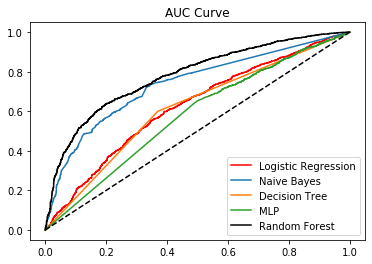

In [17]:
plt.title("AUC Curve")
plt.rcParams['figure.figsize'] = 4, 4
plt.plot(fpr,tpr,color='r',label="Logistic Regression")
plt.plot(fpr1,tpr1,label='Naive Bayes')
plt.plot(fpr2,tpr2,label='Decision Tree')
plt.plot(fpr3,tpr3,label='MLP')
plt.plot(fpr4,tpr4,color ='black',label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.legend(loc='best')
plt.show()

### Precision-Recall vs Threshold

In [18]:
rf_pred_valid=rf.predict(X_test_valid)
probs_y_valid=rf.predict_proba(X_test_valid)

(0, 1)

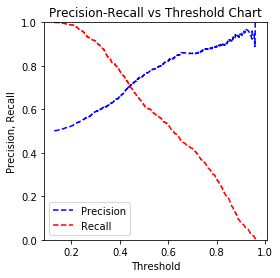

In [19]:
precision, recall, thresholds = precision_recall_curve(y_test_valid, probs_y_valid[:, 1]) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.rcParams['figure.figsize'] = 8, 8
plt.plot(thresholds, precision[: -1], "b--", label='Precision')
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

### Prediction

In [20]:
rf_pred_test=rf.predict(X_test)
confusion_matrix(y_test, rf_pred_test)

array([[1189,  274],
       [ 578,  959]])

In [21]:
rf_pred_prob_test = rf.predict_proba(X_test)

In [22]:
prob_df = pd.DataFrame(rf_pred_prob_test,columns=['Prob_nd','Prob_default'], index =X_test.index )

In [23]:
Result_df = X_test.copy()
Result_df['Result'] = rf_pred_test
Result_df = pd.merge(Result_df, prob_df, left_index=True, right_index=True)

In [24]:
Result_df=Result_df.loc[Result_df['Result']==0]

In [25]:
Result_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Result,Prob_nd,Prob_default
43,140000.0,2,2,1,37,0,0,0,0,0,...,0.498586,0.021429,0.021429,0.021429,0.028571,0.028571,0.021429,0,0.765800,0.234200
12536,150000.0,2,3,1,24,-2,-2,-2,-2,-2,...,0.006493,0.011133,0.028867,0.053600,0.010033,0.006493,0.000000,0,0.771869,0.228131
14083,600000.0,1,2,1,50,0,0,0,0,0,...,0.418285,0.014622,0.017602,0.014382,0.014890,0.014973,0.015510,0,0.795260,0.204740
4651,330000.0,2,1,2,44,0,0,2,0,0,...,0.812561,0.064848,0.000000,0.028485,0.028915,0.029594,0.029655,0,0.539177,0.460823
9277,160000.0,1,1,2,31,-1,-1,-1,-1,-1,...,0.012663,0.008444,0.000000,0.017331,0.001344,0.012663,0.000000,0,0.580955,0.419045


### Calculate Credit Increase Amount

In [26]:
Result_df['Total_Bill_Amount'] = Result_df['BILL_AMT6'] * Result_df["LIMIT_BAL"]

In [27]:
Result_df['Max_tolerance']=Result_df['LIMIT_BAL']*Result_df['Prob_default']
Result_df['Actual_tolerance']=Result_df['LIMIT_BAL']*Result_df['Prob_default']*Result_df['BILL_AMT6']
Result_df['Credit_Increase']=Result_df['Max_tolerance']-Result_df['Actual_tolerance']

### Generate Final List for Credit Increase

In [28]:
Result_df_nonneg = Result_df[Result_df.Credit_Increase>0]

In [29]:
Result_df_nonneg = Result_df_nonneg.sort_values(by=['Total_Bill_Amount'],ascending=False)
Result_df_nonneg= Result_df_nonneg.head(200)
Final_list_nonneg = Result_df_nonneg[['Credit_Increase','Total_Bill_Amount','Prob_nd']]

In [30]:
Final_list_nonneg

,Credit_Increase,Total_Bill_Amount,Prob_nd
5333,21484.142878,511905.0,0.684497
6,8722.935723,473944.0,0.665224
15223,27856.650718,392879.0,0.584979
21087,6842.503001,361201.0,0.636018
2455,33421.437065,356161.0,0.678142
...,...,...,...
12321,39312.202453,106313.0,0.580388
14203,10214.947733,106280.0,0.697066
13317,38086.092634,106172.0,0.829842
14455,11406.442501,103970.0,0.752195


In [31]:
sum(Final_list_nonneg.Credit_Increase)

5631421.78534925

In [32]:
Final_list_nonneg_1 = Final_list_nonneg[Final_list_nonneg.Prob_nd>0.4]

In [33]:
assert(len(Final_list_nonneg_1)==200)